# Distribution by Time - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2025-02-25 14:15:00,1358.4,1360.8,1358.2,1360.5,6708
2025-02-25 14:20:00,1360.3,1362.1,1359.4,1361.0,7025
2025-02-25 14:25:00,1361.0,1362.2,1360.8,1361.7,4896


In [5]:
hourly_data = data.copy().resample('H').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
hourly_data.dropna(subset=['Close'], inplace=True)

## Hour High-Low distribution

In [7]:
hourly_data['volatility'] = hourly_data['High'] - hourly_data['Low']
hourly_data["hour"] = hourly_data.index.hour

<Axes: xlabel='hour'>

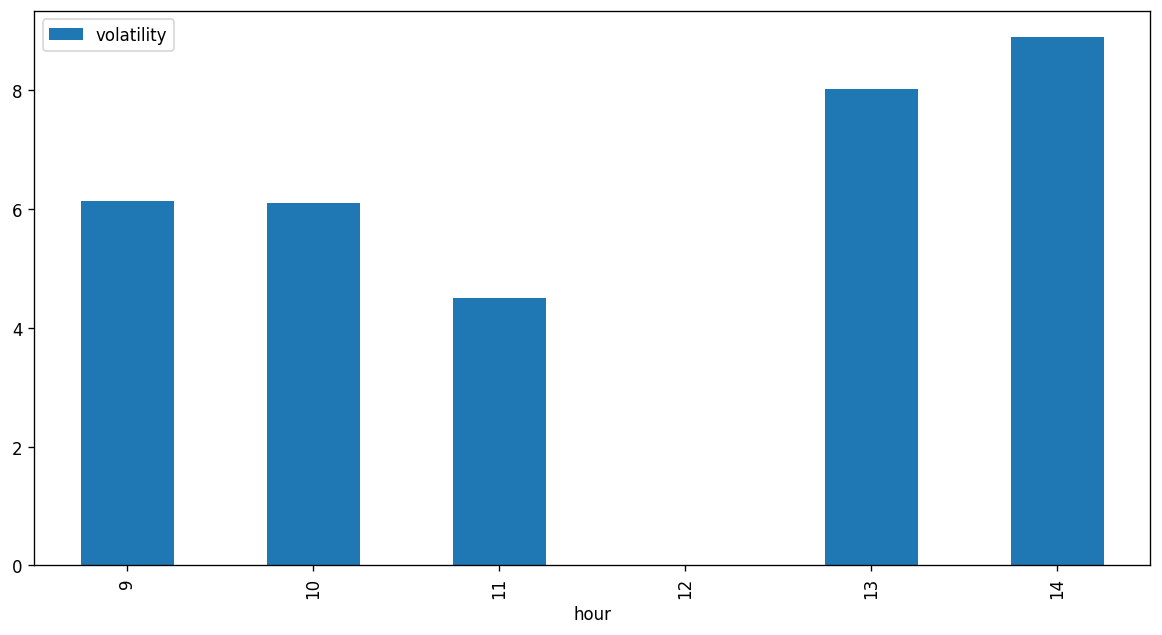

In [8]:
hourly_data_grouped_by_hour = hourly_data.groupby(['hour'])[['volatility']].mean()
hourly_data_grouped_by_hour.plot.bar()

## Month volatility distribution

In [9]:
month_data = data.copy().resample('M').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
month_data.dropna(subset=['Close'], inplace=True)

In [12]:
month_data['volatility'] = month_data['High'] - month_data['Low']
month_data["month"] = month_data.index.month

<Axes: xlabel='month'>

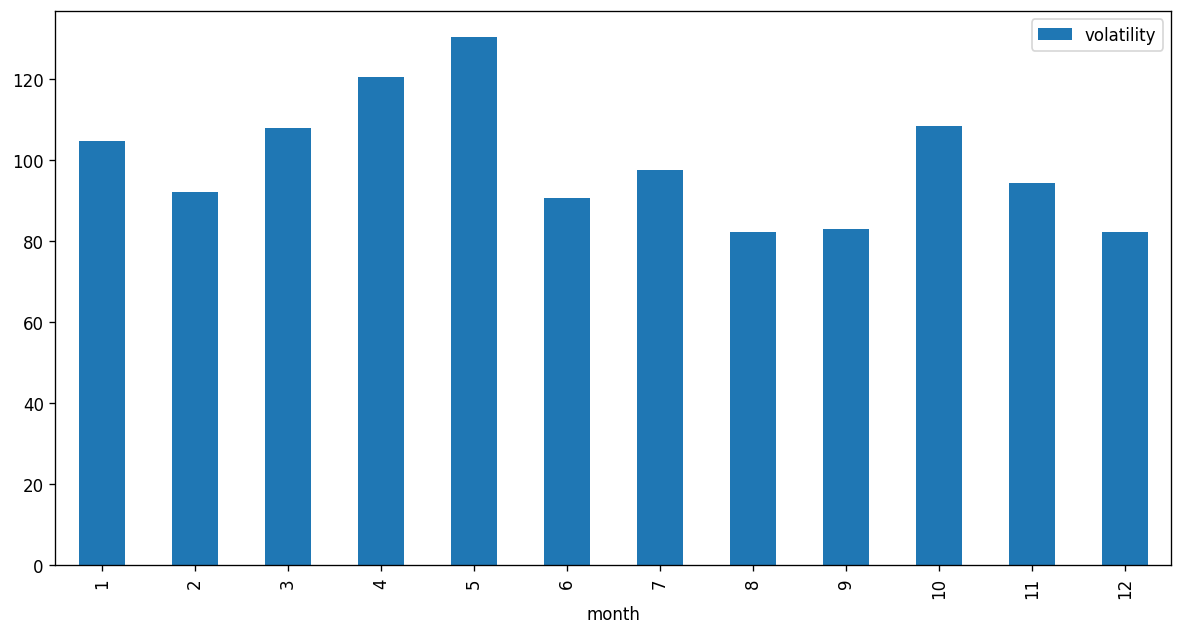

In [13]:
month_data_grouped_by_hour = month_data.groupby(['month'])[['volatility']].mean()
month_data_grouped_by_hour.plot.bar()

## Day volatility distribution

In [14]:
daily_data = data.copy().resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

In [15]:
daily_data['volatility'] = daily_data['High'] - daily_data['Low']
daily_data["day"] = daily_data.index.day

<Axes: xlabel='day'>

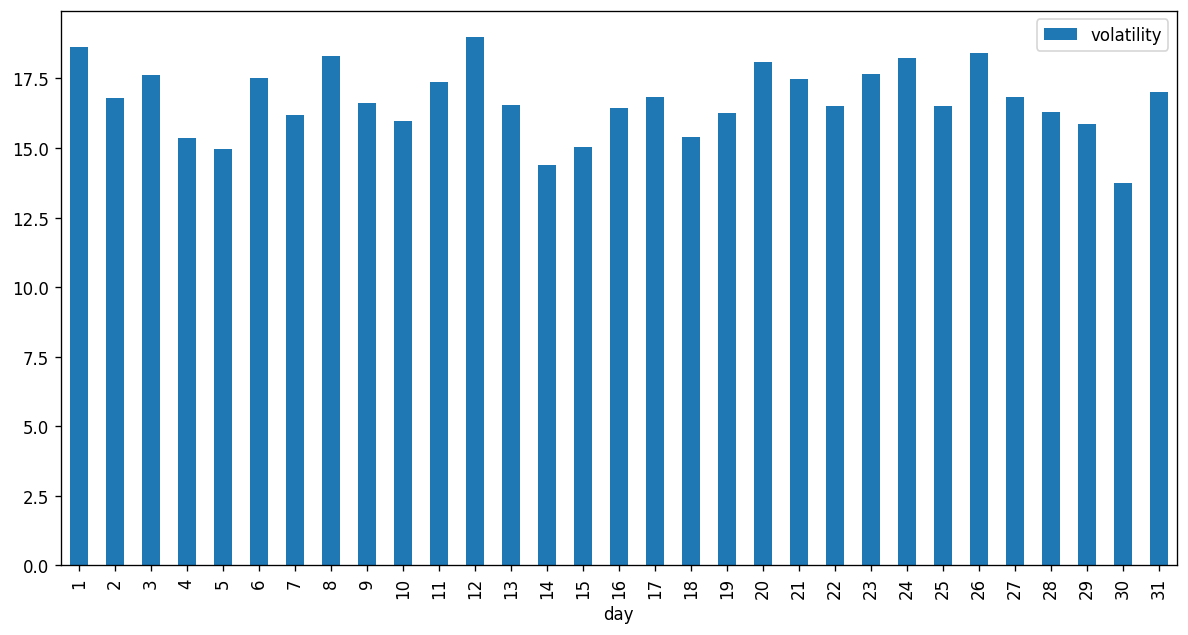

In [16]:
daily_data_grouped_by_hour = daily_data.groupby(['day'])[['volatility']].mean()
daily_data_grouped_by_hour.plot.bar()

## Day High-Low distribution

In [23]:
dfd = daily_data[['High', 'Low']].copy().rename(columns={'High': 'day_High', 'Low': 'day_Low'})
dfh = data.copy().resample('H').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
dfh.dropna(subset=['Close'], inplace=True)
dfh = dfh.assign(time_d=pd.PeriodIndex(dfh.index, freq='1D').to_timestamp())
df_merged = pd.merge(dfh, dfd, left_on="time_d", right_index=True, how="left")
df_merged['is_max'] = df_merged['High'] == df_merged['day_High']
df_merged['is_min'] = df_merged['Low'] == df_merged['day_Low']
df_merged['hour'] = df_merged.index.hour
df_merged['minute'] = df_merged.index.minute
df_merged["count"] = 1
analytics_data = df_merged[(df_merged.is_max == True) | (df_merged.is_min == True)]

<Axes: xlabel='hour'>

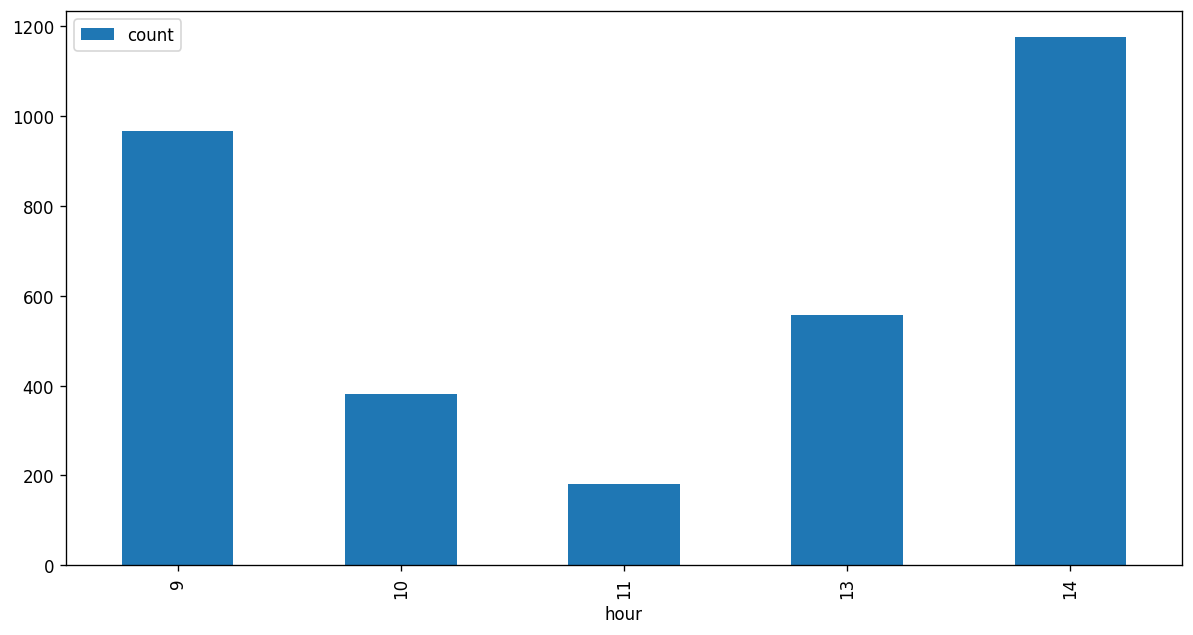

In [25]:
analytics_data_grouped_by_hour = analytics_data.groupby(['hour'])[['count']].count()
analytics_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

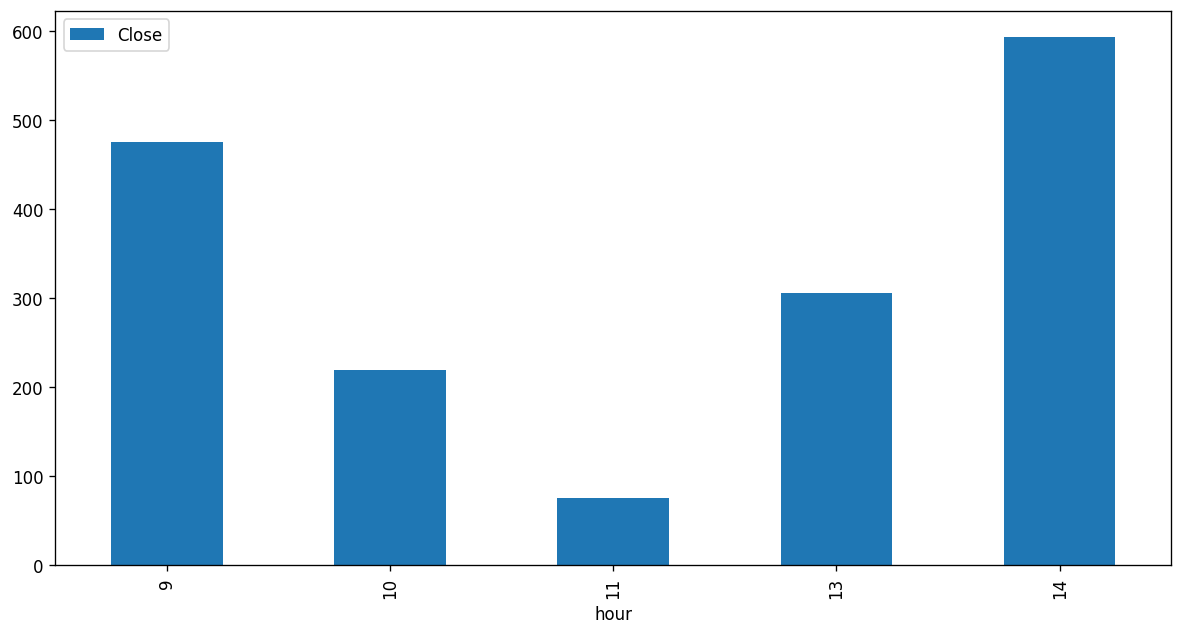

In [21]:
max_data = analytics_data[analytics_data.is_max == True]
max_data_grouped_by_hour = max_data.groupby(['hour'])[['Close']].count()
max_data_grouped_by_hour.plot.bar()

<Axes: xlabel='hour'>

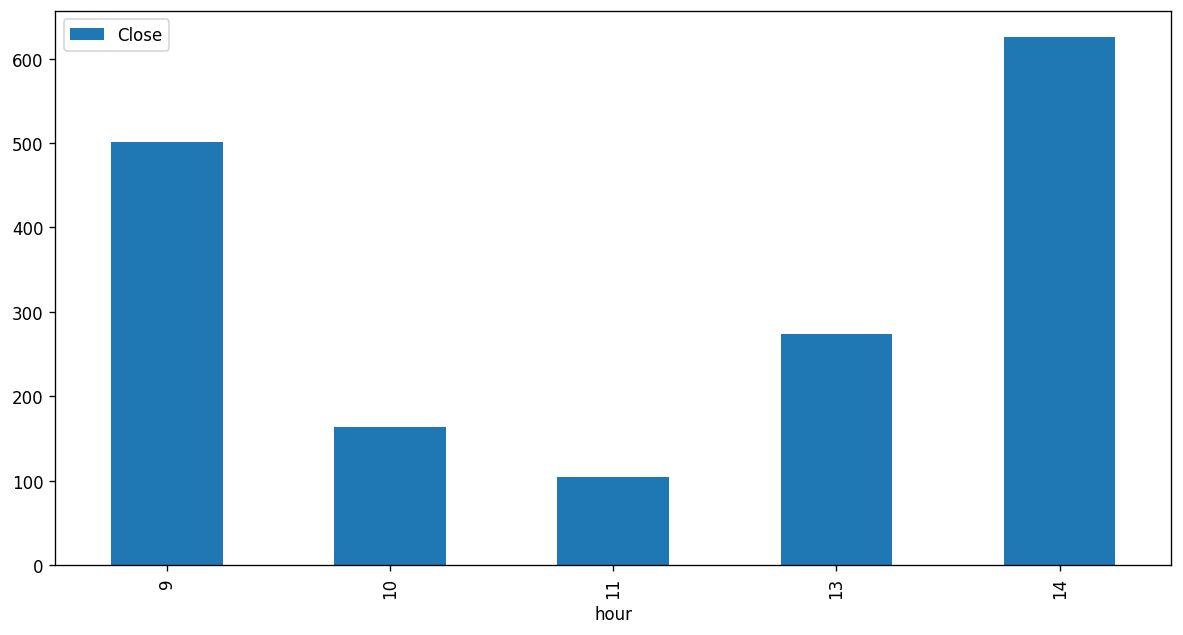

In [22]:
min_data = analytics_data[analytics_data.is_min == True]
min_data_grouped_by_hour = min_data.groupby(['hour'])[['Close']].count()
min_data_grouped_by_hour.plot.bar()

## Volume Analytics

In [22]:
month_data

,Volume,Open,Close,High,Low
Date,,,,,
2018-08-31,1104281,943.5,965.7,973.3,935.5
2018-09-30,1523631,964.5,987.4,990.4,930.5
2018-10-31,2374278,989.0,904.0,992.0,856.3
2018-11-30,2718341,904.5,887.5,910.0,862.5
2018-12-31,2425683,896.7,855.0,926.0,855.0
...,...,...,...,...,...
2024-10-31,4655337,1361.5,1343.5,1377.9,1327.0
2024-11-30,4654595,1340.4,1318.0,1343.6,1253.5
2024-12-31,3720880,1322.6,1345.5,1357.5,1302.2


In [23]:
# Simply volume value
month_data['Volume_s'] = round(month_data['Volume'] / 1000)

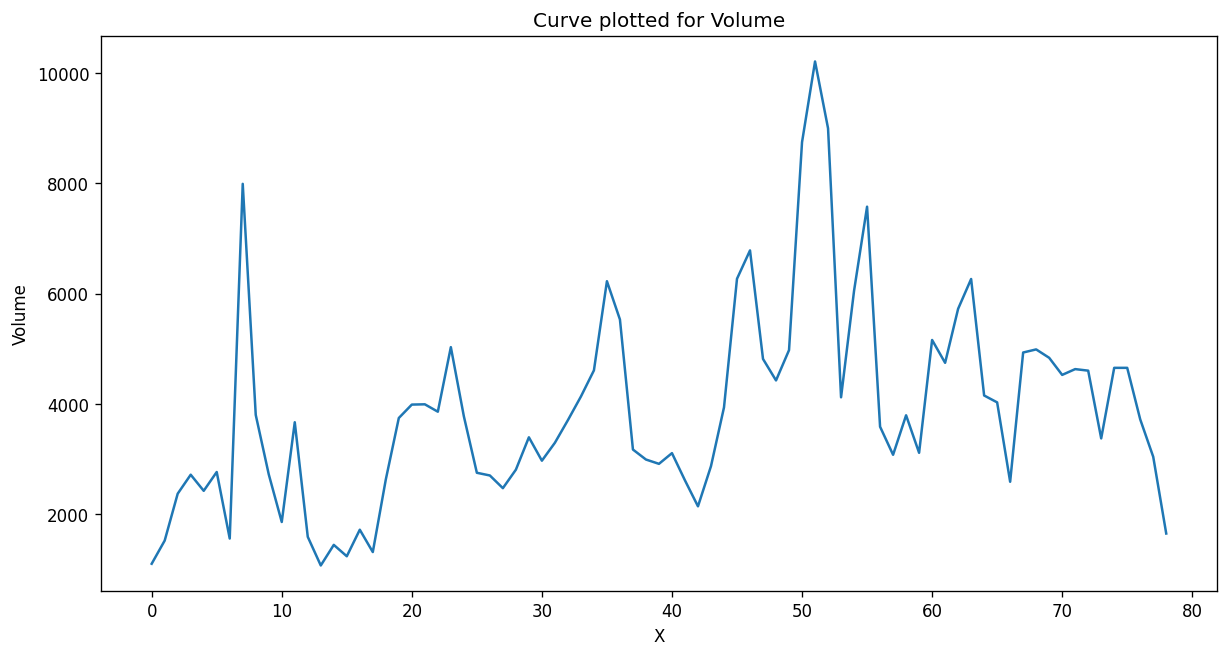

In [24]:
X = np.array(range(0, len(month_data['Volume'])))
Y = month_data['Volume_s']
# Plotting the Graph
plt.plot(X, Y)
plt.title("Curve plotted for Volume")
plt.xlabel("X")
plt.ylabel("Volume")
plt.show()

<Axes: xlabel='year'>

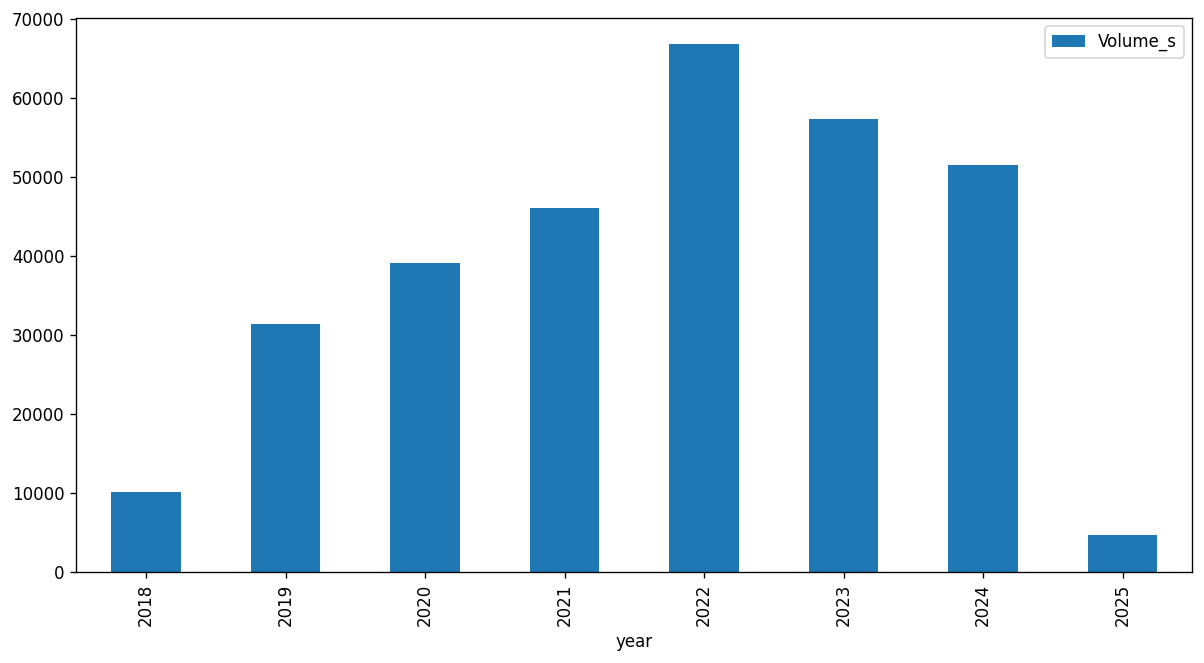

In [25]:
month_data['year'] = month_data.index.year
month_data_grouped_by_year = month_data.groupby(['year'])[['Volume_s']].sum()
month_data_grouped_by_year.plot.bar()

<Axes: xlabel='month'>

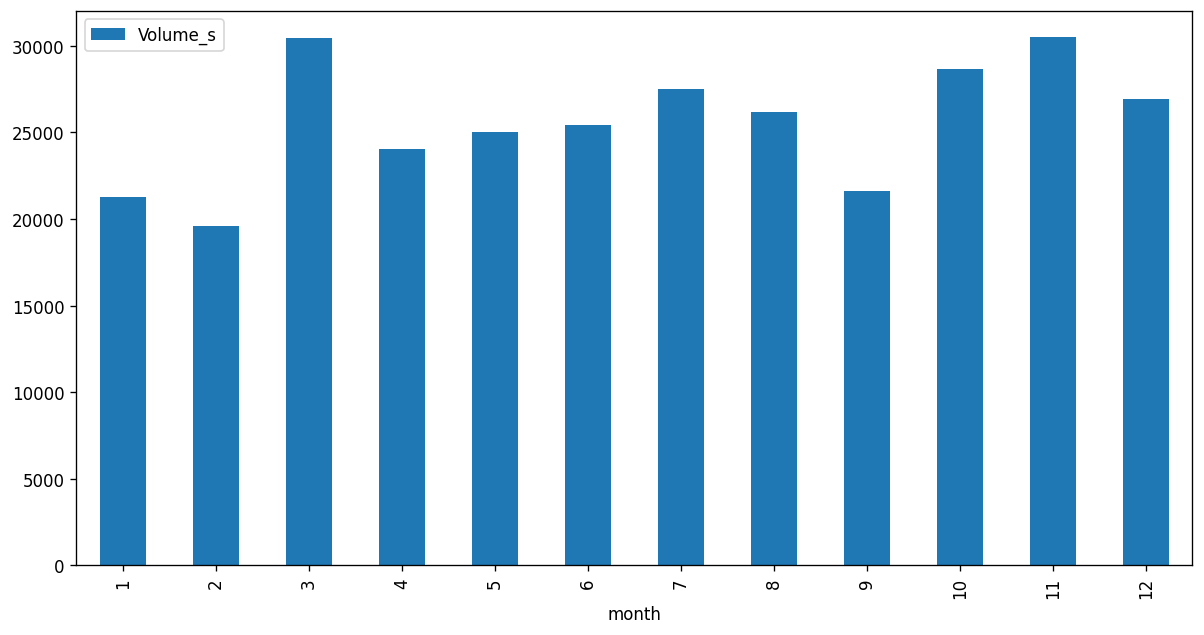

In [26]:
month_data['month'] = month_data.index.month
month_data_grouped_by_mon = month_data.groupby(['month'])[['Volume_s']].sum()
month_data_grouped_by_mon.plot.bar()

## High-Low analytics

<Axes: xlabel='year_month'>

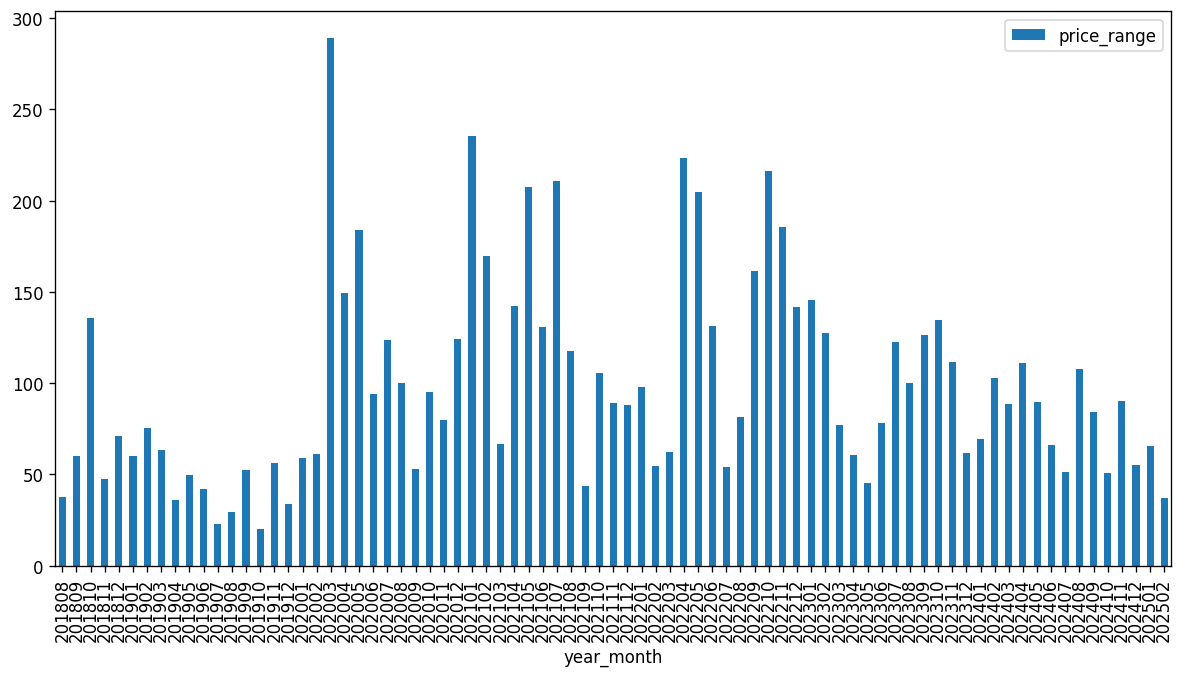

In [27]:
month_data['year_month'] = month_data.apply(lambda r: str(r.name.year)+'{:02}'.format(r.name.month), axis=1)
month_data['price_range'] = month_data['High'] - month_data['Low']
month_data_prr_grouped_by_mon = month_data.groupby(['year_month'])[['price_range']].mean()
month_data_prr_grouped_by_mon.plot.bar()

In [30]:
hourly_data['year_hour1'] = hourly_data.apply(lambda r: str(r.name.year)+'{:02}'.format(r.name.hour), axis=1)
hourly_data['year_hour2'] = hourly_data.apply(lambda r: '{:02}'.format(r.name.hour) + '-' +str(r.name.year), axis=1)
hourly_data['price_range'] = hourly_data['High'] - hourly_data['Low']

<Axes: xlabel='year_hour1'>

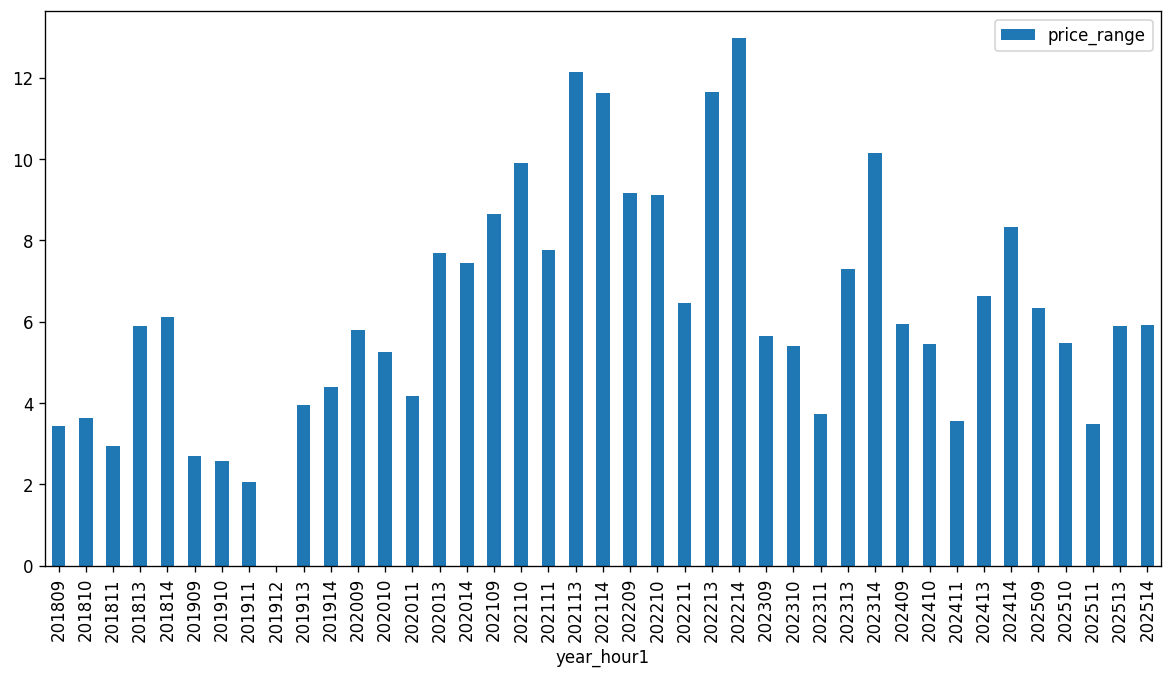

In [31]:
hourly_data_prr_grouped_by_yhour1 = hourly_data.groupby(['year_hour1'])[['price_range']].mean()
hourly_data_prr_grouped_by_yhour1.plot.bar()

<Axes: xlabel='year_hour2'>

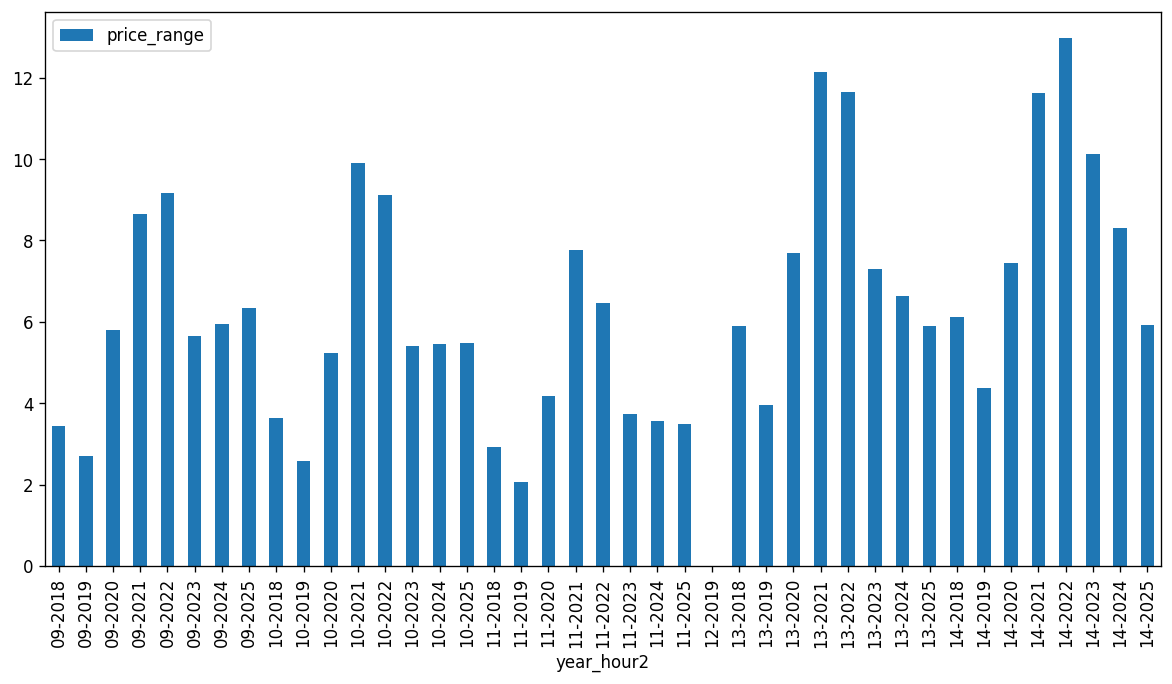

In [32]:
hourly_data_prr_grouped_by_yhour2 = hourly_data.groupby(['year_hour2'])[['price_range']].mean()
hourly_data_prr_grouped_by_yhour2.plot.bar()